In [16]:
import os
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt

from bank_schedule import scheduler
from bank_schedule.data import Data
from bank_schedule.ortools_tsp import get_best_route
from bank_schedule.constants import RAW_DATA_FOLDER, INTERIM_DATA_FOLDER

In [2]:
loader = Data(RAW_DATA_FOLDER)

In [4]:
cars_number_dict = {}
max_route_time = 720

for deadline_threshold in [1, 2]:
    for atms_per_day_min in [100, 150, 200]:
        for neighborhood_radius in [10, 15, 20]:
            title =f'deadline_threshold = {deadline_threshold}, atms_per_day_min = {atms_per_day_min}, neighborhood_radius = {neighborhood_radius}'

            schedule_df = \
                scheduler.prepare_schedule(
                    loader, # загрузчик данных
                    forecast_horizon=14, # горизонт прогноза при ежедневном обновлении расписания
                    deadline_threshold=deadline_threshold, # за сколько дней до "дедлайна" инкассировать банкоматы
                    atms_per_day_min=atms_per_day_min, # сколько банкоматов минимум надо объехать задень
                    neighborhood_radius=15, # в каком радиусе времени пути банкоматы подходят для попутного объезда
                    use_greedy_scheduler=False, # использовать жадный настройщик расписания
                    use_real_data_for_update=True, # использовать реальные данные для обновления расписания
                    last_collection_method='constant', # как проставлять дату последней инкассации в файле остатков
                    forecast_model_name='lgbm', # какую модель использовать для прогноза
                    end_date='2022-09-30' # какой датой закончить прогноз (дата начала берется из файла остатков)
                    )

            schedule = schedule_df.groupby('date')['TID'].agg(list).to_dict()

            cars_number_dict[title] = []

            for date, tids_list in schedule.items():

                _, route_time, _ = get_best_route(loader, tids_list, n_iterations=1)
                cars_number_dict[title].append( sum(route_time) /  max_route_time )
                print(title, round(sum(route_time), 2))

/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/forecast.py:265: UserWarning: Дата 2022-08-31 00:00:00 не найдена в данных, прогнозируем средним по TID
  warn(f'Дата {today_date} не найдена в данных, прогнозируем средним по TID')
/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/scheduler.py:371: UserWarning: Банкоматов, обязательных для обслуживания - 115 (> 100). Будут инкассироваться только они, соседние не добавляем.
  warn(
/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/scheduler.py:371: UserWarning: Банкоматов, обязательных для обслуживания - 101 (> 100). Будут инкассироваться только они, соседние не добавляем.
  warn(
/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/scheduler.py:371: UserWarning: Банкоматов, обязательных для обслуживания - 112 (> 100). Будут инкассироваться только они, соседние не добавляем.
  warn(
/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/scheduler.py:371: UserWarning: Банкоматов, о

deadline_threshold = 1, atms_per_day_min = 100, neighborhood_radius = 10 1827.87
deadline_threshold = 1, atms_per_day_min = 100, neighborhood_radius = 10 1833.6
deadline_threshold = 1, atms_per_day_min = 100, neighborhood_radius = 10 2579.8
deadline_threshold = 1, atms_per_day_min = 100, neighborhood_radius = 10 2510.26
deadline_threshold = 1, atms_per_day_min = 100, neighborhood_radius = 10 2440.4
deadline_threshold = 1, atms_per_day_min = 100, neighborhood_radius = 10 2755.9
deadline_threshold = 1, atms_per_day_min = 100, neighborhood_radius = 10 2827.87
deadline_threshold = 1, atms_per_day_min = 100, neighborhood_radius = 10 2907.63
deadline_threshold = 1, atms_per_day_min = 100, neighborhood_radius = 10 2616.61
deadline_threshold = 1, atms_per_day_min = 100, neighborhood_radius = 10 3378.48
deadline_threshold = 1, atms_per_day_min = 100, neighborhood_radius = 10 2903.34
deadline_threshold = 1, atms_per_day_min = 100, neighborhood_radius = 10 3160.29
deadline_threshold = 1, atms_per

/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/forecast.py:265: UserWarning: Дата 2022-08-31 00:00:00 не найдена в данных, прогнозируем средним по TID
  warn(f'Дата {today_date} не найдена в данных, прогнозируем средним по TID')
/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/scheduler.py:371: UserWarning: Банкоматов, обязательных для обслуживания - 115 (> 100). Будут инкассироваться только они, соседние не добавляем.
  warn(
/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/scheduler.py:371: UserWarning: Банкоматов, обязательных для обслуживания - 101 (> 100). Будут инкассироваться только они, соседние не добавляем.
  warn(
/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/scheduler.py:371: UserWarning: Банкоматов, обязательных для обслуживания - 112 (> 100). Будут инкассироваться только они, соседние не добавляем.
  warn(
/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/scheduler.py:371: UserWarning: Банкоматов, о

deadline_threshold = 1, atms_per_day_min = 100, neighborhood_radius = 15 1830.37
deadline_threshold = 1, atms_per_day_min = 100, neighborhood_radius = 15 1889.2
deadline_threshold = 1, atms_per_day_min = 100, neighborhood_radius = 15 2533.2
deadline_threshold = 1, atms_per_day_min = 100, neighborhood_radius = 15 2496.04
deadline_threshold = 1, atms_per_day_min = 100, neighborhood_radius = 15 2396.17
deadline_threshold = 1, atms_per_day_min = 100, neighborhood_radius = 15 2746.39
deadline_threshold = 1, atms_per_day_min = 100, neighborhood_radius = 15 2816.12
deadline_threshold = 1, atms_per_day_min = 100, neighborhood_radius = 15 2935.12
deadline_threshold = 1, atms_per_day_min = 100, neighborhood_radius = 15 2650.16
deadline_threshold = 1, atms_per_day_min = 100, neighborhood_radius = 15 3342.13
deadline_threshold = 1, atms_per_day_min = 100, neighborhood_radius = 15 3037.59
deadline_threshold = 1, atms_per_day_min = 100, neighborhood_radius = 15 3087.93
deadline_threshold = 1, atms_p

/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/forecast.py:265: UserWarning: Дата 2022-08-31 00:00:00 не найдена в данных, прогнозируем средним по TID
  warn(f'Дата {today_date} не найдена в данных, прогнозируем средним по TID')
/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/scheduler.py:371: UserWarning: Банкоматов, обязательных для обслуживания - 115 (> 100). Будут инкассироваться только они, соседние не добавляем.
  warn(
/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/scheduler.py:371: UserWarning: Банкоматов, обязательных для обслуживания - 101 (> 100). Будут инкассироваться только они, соседние не добавляем.
  warn(
/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/scheduler.py:371: UserWarning: Банкоматов, обязательных для обслуживания - 112 (> 100). Будут инкассироваться только они, соседние не добавляем.
  warn(
/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/scheduler.py:371: UserWarning: Банкоматов, о

deadline_threshold = 1, atms_per_day_min = 100, neighborhood_radius = 20 1804.31
deadline_threshold = 1, atms_per_day_min = 100, neighborhood_radius = 20 1908.43
deadline_threshold = 1, atms_per_day_min = 100, neighborhood_radius = 20 2567.75
deadline_threshold = 1, atms_per_day_min = 100, neighborhood_radius = 20 2446.74
deadline_threshold = 1, atms_per_day_min = 100, neighborhood_radius = 20 2393.93
deadline_threshold = 1, atms_per_day_min = 100, neighborhood_radius = 20 2740.66
deadline_threshold = 1, atms_per_day_min = 100, neighborhood_radius = 20 2814.66
deadline_threshold = 1, atms_per_day_min = 100, neighborhood_radius = 20 2932.34
deadline_threshold = 1, atms_per_day_min = 100, neighborhood_radius = 20 2616.11
deadline_threshold = 1, atms_per_day_min = 100, neighborhood_radius = 20 3410.54
deadline_threshold = 1, atms_per_day_min = 100, neighborhood_radius = 20 2968.11
deadline_threshold = 1, atms_per_day_min = 100, neighborhood_radius = 20 3136.17
deadline_threshold = 1, atms

/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/forecast.py:265: UserWarning: Дата 2022-08-31 00:00:00 не найдена в данных, прогнозируем средним по TID
  warn(f'Дата {today_date} не найдена в данных, прогнозируем средним по TID')


deadline_threshold = 1, atms_per_day_min = 150, neighborhood_radius = 10 2524.5
deadline_threshold = 1, atms_per_day_min = 150, neighborhood_radius = 10 2648.57
deadline_threshold = 1, atms_per_day_min = 150, neighborhood_radius = 10 3325.14
deadline_threshold = 1, atms_per_day_min = 150, neighborhood_radius = 10 3156.17
deadline_threshold = 1, atms_per_day_min = 150, neighborhood_radius = 10 3092.42
deadline_threshold = 1, atms_per_day_min = 150, neighborhood_radius = 10 3370.22
deadline_threshold = 1, atms_per_day_min = 150, neighborhood_radius = 10 3527.46
deadline_threshold = 1, atms_per_day_min = 150, neighborhood_radius = 10 3588.52
deadline_threshold = 1, atms_per_day_min = 150, neighborhood_radius = 10 3203.68
deadline_threshold = 1, atms_per_day_min = 150, neighborhood_radius = 10 3732.5
deadline_threshold = 1, atms_per_day_min = 150, neighborhood_radius = 10 3690.24
deadline_threshold = 1, atms_per_day_min = 150, neighborhood_radius = 10 3664.58
deadline_threshold = 1, atms_p

/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/forecast.py:265: UserWarning: Дата 2022-08-31 00:00:00 не найдена в данных, прогнозируем средним по TID
  warn(f'Дата {today_date} не найдена в данных, прогнозируем средним по TID')


deadline_threshold = 1, atms_per_day_min = 150, neighborhood_radius = 15 2523.33
deadline_threshold = 1, atms_per_day_min = 150, neighborhood_radius = 15 2664.91
deadline_threshold = 1, atms_per_day_min = 150, neighborhood_radius = 15 3284.07
deadline_threshold = 1, atms_per_day_min = 150, neighborhood_radius = 15 3153.59
deadline_threshold = 1, atms_per_day_min = 150, neighborhood_radius = 15 3115.99
deadline_threshold = 1, atms_per_day_min = 150, neighborhood_radius = 15 3316.58
deadline_threshold = 1, atms_per_day_min = 150, neighborhood_radius = 15 3500.69
deadline_threshold = 1, atms_per_day_min = 150, neighborhood_radius = 15 3613.75
deadline_threshold = 1, atms_per_day_min = 150, neighborhood_radius = 15 3173.27
deadline_threshold = 1, atms_per_day_min = 150, neighborhood_radius = 15 3737.89
deadline_threshold = 1, atms_per_day_min = 150, neighborhood_radius = 15 3526.77
deadline_threshold = 1, atms_per_day_min = 150, neighborhood_radius = 15 3694.22
deadline_threshold = 1, atms

/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/forecast.py:265: UserWarning: Дата 2022-08-31 00:00:00 не найдена в данных, прогнозируем средним по TID
  warn(f'Дата {today_date} не найдена в данных, прогнозируем средним по TID')


deadline_threshold = 1, atms_per_day_min = 150, neighborhood_radius = 20 2491.86
deadline_threshold = 1, atms_per_day_min = 150, neighborhood_radius = 20 2647.17
deadline_threshold = 1, atms_per_day_min = 150, neighborhood_radius = 20 3341.69
deadline_threshold = 1, atms_per_day_min = 150, neighborhood_radius = 20 3148.25
deadline_threshold = 1, atms_per_day_min = 150, neighborhood_radius = 20 3105.36
deadline_threshold = 1, atms_per_day_min = 150, neighborhood_radius = 20 3354.43
deadline_threshold = 1, atms_per_day_min = 150, neighborhood_radius = 20 3516.51
deadline_threshold = 1, atms_per_day_min = 150, neighborhood_radius = 20 3623.27
deadline_threshold = 1, atms_per_day_min = 150, neighborhood_radius = 20 3140.03
deadline_threshold = 1, atms_per_day_min = 150, neighborhood_radius = 20 3730.29
deadline_threshold = 1, atms_per_day_min = 150, neighborhood_radius = 20 3631.0
deadline_threshold = 1, atms_per_day_min = 150, neighborhood_radius = 20 3681.52
deadline_threshold = 1, atms_

/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/forecast.py:265: UserWarning: Дата 2022-08-31 00:00:00 не найдена в данных, прогнозируем средним по TID
  warn(f'Дата {today_date} не найдена в данных, прогнозируем средним по TID')


deadline_threshold = 1, atms_per_day_min = 200, neighborhood_radius = 10 3166.98
deadline_threshold = 1, atms_per_day_min = 200, neighborhood_radius = 10 3360.47
deadline_threshold = 1, atms_per_day_min = 200, neighborhood_radius = 10 4055.75
deadline_threshold = 1, atms_per_day_min = 200, neighborhood_radius = 10 3836.09
deadline_threshold = 1, atms_per_day_min = 200, neighborhood_radius = 10 3865.03
deadline_threshold = 1, atms_per_day_min = 200, neighborhood_radius = 10 4000.71
deadline_threshold = 1, atms_per_day_min = 200, neighborhood_radius = 10 4051.45
deadline_threshold = 1, atms_per_day_min = 200, neighborhood_radius = 10 4278.81
deadline_threshold = 1, atms_per_day_min = 200, neighborhood_radius = 10 3890.86
deadline_threshold = 1, atms_per_day_min = 200, neighborhood_radius = 10 4373.37
deadline_threshold = 1, atms_per_day_min = 200, neighborhood_radius = 10 4190.65
deadline_threshold = 1, atms_per_day_min = 200, neighborhood_radius = 10 4032.57
deadline_threshold = 1, atms

/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/forecast.py:265: UserWarning: Дата 2022-08-31 00:00:00 не найдена в данных, прогнозируем средним по TID
  warn(f'Дата {today_date} не найдена в данных, прогнозируем средним по TID')


deadline_threshold = 1, atms_per_day_min = 200, neighborhood_radius = 15 3151.24
deadline_threshold = 1, atms_per_day_min = 200, neighborhood_radius = 15 3345.62
deadline_threshold = 1, atms_per_day_min = 200, neighborhood_radius = 15 4020.02
deadline_threshold = 1, atms_per_day_min = 200, neighborhood_radius = 15 3890.69
deadline_threshold = 1, atms_per_day_min = 200, neighborhood_radius = 15 3868.34
deadline_threshold = 1, atms_per_day_min = 200, neighborhood_radius = 15 4022.48
deadline_threshold = 1, atms_per_day_min = 200, neighborhood_radius = 15 4051.23
deadline_threshold = 1, atms_per_day_min = 200, neighborhood_radius = 15 4210.92
deadline_threshold = 1, atms_per_day_min = 200, neighborhood_radius = 15 3888.58
deadline_threshold = 1, atms_per_day_min = 200, neighborhood_radius = 15 4431.73
deadline_threshold = 1, atms_per_day_min = 200, neighborhood_radius = 15 4076.82
deadline_threshold = 1, atms_per_day_min = 200, neighborhood_radius = 15 4031.75
deadline_threshold = 1, atms

/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/forecast.py:265: UserWarning: Дата 2022-08-31 00:00:00 не найдена в данных, прогнозируем средним по TID
  warn(f'Дата {today_date} не найдена в данных, прогнозируем средним по TID')


deadline_threshold = 1, atms_per_day_min = 200, neighborhood_radius = 20 3162.42
deadline_threshold = 1, atms_per_day_min = 200, neighborhood_radius = 20 3346.05
deadline_threshold = 1, atms_per_day_min = 200, neighborhood_radius = 20 4022.34
deadline_threshold = 1, atms_per_day_min = 200, neighborhood_radius = 20 3852.69
deadline_threshold = 1, atms_per_day_min = 200, neighborhood_radius = 20 3856.97
deadline_threshold = 1, atms_per_day_min = 200, neighborhood_radius = 20 4042.07
deadline_threshold = 1, atms_per_day_min = 200, neighborhood_radius = 20 4051.23
deadline_threshold = 1, atms_per_day_min = 200, neighborhood_radius = 20 4409.53
deadline_threshold = 1, atms_per_day_min = 200, neighborhood_radius = 20 3912.1
deadline_threshold = 1, atms_per_day_min = 200, neighborhood_radius = 20 4413.17
deadline_threshold = 1, atms_per_day_min = 200, neighborhood_radius = 20 4134.11
deadline_threshold = 1, atms_per_day_min = 200, neighborhood_radius = 20 4016.96
deadline_threshold = 1, atms_

/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/forecast.py:265: UserWarning: Дата 2022-08-31 00:00:00 не найдена в данных, прогнозируем средним по TID
  warn(f'Дата {today_date} не найдена в данных, прогнозируем средним по TID')
/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/scheduler.py:371: UserWarning: Банкоматов, обязательных для обслуживания - 121 (> 100). Будут инкассироваться только они, соседние не добавляем.
  warn(
/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/scheduler.py:371: UserWarning: Банкоматов, обязательных для обслуживания - 110 (> 100). Будут инкассироваться только они, соседние не добавляем.
  warn(
/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/scheduler.py:371: UserWarning: Банкоматов, обязательных для обслуживания - 132 (> 100). Будут инкассироваться только они, соседние не добавляем.
  warn(
/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/scheduler.py:371: UserWarning: Банкоматов, о

deadline_threshold = 2, atms_per_day_min = 100, neighborhood_radius = 10 2158.45
deadline_threshold = 2, atms_per_day_min = 100, neighborhood_radius = 10 2406.64
deadline_threshold = 2, atms_per_day_min = 100, neighborhood_radius = 10 2545.56
deadline_threshold = 2, atms_per_day_min = 100, neighborhood_radius = 10 2480.35
deadline_threshold = 2, atms_per_day_min = 100, neighborhood_radius = 10 2737.1
deadline_threshold = 2, atms_per_day_min = 100, neighborhood_radius = 10 2883.3
deadline_threshold = 2, atms_per_day_min = 100, neighborhood_radius = 10 2814.11
deadline_threshold = 2, atms_per_day_min = 100, neighborhood_radius = 10 2684.88
deadline_threshold = 2, atms_per_day_min = 100, neighborhood_radius = 10 3408.58
deadline_threshold = 2, atms_per_day_min = 100, neighborhood_radius = 10 3190.38
deadline_threshold = 2, atms_per_day_min = 100, neighborhood_radius = 10 3541.15
deadline_threshold = 2, atms_per_day_min = 100, neighborhood_radius = 10 2963.15
deadline_threshold = 2, atms_p

/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/forecast.py:265: UserWarning: Дата 2022-08-31 00:00:00 не найдена в данных, прогнозируем средним по TID
  warn(f'Дата {today_date} не найдена в данных, прогнозируем средним по TID')
/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/scheduler.py:371: UserWarning: Банкоматов, обязательных для обслуживания - 121 (> 100). Будут инкассироваться только они, соседние не добавляем.
  warn(
/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/scheduler.py:371: UserWarning: Банкоматов, обязательных для обслуживания - 110 (> 100). Будут инкассироваться только они, соседние не добавляем.
  warn(
/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/scheduler.py:371: UserWarning: Банкоматов, обязательных для обслуживания - 132 (> 100). Будут инкассироваться только они, соседние не добавляем.
  warn(
/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/scheduler.py:371: UserWarning: Банкоматов, о

deadline_threshold = 2, atms_per_day_min = 100, neighborhood_radius = 15 2147.48
deadline_threshold = 2, atms_per_day_min = 100, neighborhood_radius = 15 2419.97
deadline_threshold = 2, atms_per_day_min = 100, neighborhood_radius = 15 2512.61
deadline_threshold = 2, atms_per_day_min = 100, neighborhood_radius = 15 2448.91
deadline_threshold = 2, atms_per_day_min = 100, neighborhood_radius = 15 2737.82
deadline_threshold = 2, atms_per_day_min = 100, neighborhood_radius = 15 2959.04
deadline_threshold = 2, atms_per_day_min = 100, neighborhood_radius = 15 2804.68
deadline_threshold = 2, atms_per_day_min = 100, neighborhood_radius = 15 2695.32
deadline_threshold = 2, atms_per_day_min = 100, neighborhood_radius = 15 3455.34
deadline_threshold = 2, atms_per_day_min = 100, neighborhood_radius = 15 3124.04
deadline_threshold = 2, atms_per_day_min = 100, neighborhood_radius = 15 3542.02
deadline_threshold = 2, atms_per_day_min = 100, neighborhood_radius = 15 2946.55
deadline_threshold = 2, atms

/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/forecast.py:265: UserWarning: Дата 2022-08-31 00:00:00 не найдена в данных, прогнозируем средним по TID
  warn(f'Дата {today_date} не найдена в данных, прогнозируем средним по TID')
/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/scheduler.py:371: UserWarning: Банкоматов, обязательных для обслуживания - 121 (> 100). Будут инкассироваться только они, соседние не добавляем.
  warn(
/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/scheduler.py:371: UserWarning: Банкоматов, обязательных для обслуживания - 110 (> 100). Будут инкассироваться только они, соседние не добавляем.
  warn(
/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/scheduler.py:371: UserWarning: Банкоматов, обязательных для обслуживания - 132 (> 100). Будут инкассироваться только они, соседние не добавляем.
  warn(
/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/scheduler.py:371: UserWarning: Банкоматов, о

deadline_threshold = 2, atms_per_day_min = 100, neighborhood_radius = 20 2137.06
deadline_threshold = 2, atms_per_day_min = 100, neighborhood_radius = 20 2443.89
deadline_threshold = 2, atms_per_day_min = 100, neighborhood_radius = 20 2558.61
deadline_threshold = 2, atms_per_day_min = 100, neighborhood_radius = 20 2445.09
deadline_threshold = 2, atms_per_day_min = 100, neighborhood_radius = 20 2675.58
deadline_threshold = 2, atms_per_day_min = 100, neighborhood_radius = 20 2996.93
deadline_threshold = 2, atms_per_day_min = 100, neighborhood_radius = 20 2787.61
deadline_threshold = 2, atms_per_day_min = 100, neighborhood_radius = 20 2722.49
deadline_threshold = 2, atms_per_day_min = 100, neighborhood_radius = 20 3364.98
deadline_threshold = 2, atms_per_day_min = 100, neighborhood_radius = 20 3154.92
deadline_threshold = 2, atms_per_day_min = 100, neighborhood_radius = 20 3567.3
deadline_threshold = 2, atms_per_day_min = 100, neighborhood_radius = 20 2973.31
deadline_threshold = 2, atms_

/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/forecast.py:265: UserWarning: Дата 2022-08-31 00:00:00 не найдена в данных, прогнозируем средним по TID
  warn(f'Дата {today_date} не найдена в данных, прогнозируем средним по TID')
/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/scheduler.py:371: UserWarning: Банкоматов, обязательных для обслуживания - 162 (> 150). Будут инкассироваться только они, соседние не добавляем.
  warn(
/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/scheduler.py:371: UserWarning: Банкоматов, обязательных для обслуживания - 158 (> 150). Будут инкассироваться только они, соседние не добавляем.
  warn(


deadline_threshold = 2, atms_per_day_min = 150, neighborhood_radius = 10 2895.04
deadline_threshold = 2, atms_per_day_min = 150, neighborhood_radius = 10 3182.33
deadline_threshold = 2, atms_per_day_min = 150, neighborhood_radius = 10 3214.37
deadline_threshold = 2, atms_per_day_min = 150, neighborhood_radius = 10 3144.76
deadline_threshold = 2, atms_per_day_min = 150, neighborhood_radius = 10 3514.68
deadline_threshold = 2, atms_per_day_min = 150, neighborhood_radius = 10 3625.13
deadline_threshold = 2, atms_per_day_min = 150, neighborhood_radius = 10 3502.9
deadline_threshold = 2, atms_per_day_min = 150, neighborhood_radius = 10 3492.1
deadline_threshold = 2, atms_per_day_min = 150, neighborhood_radius = 10 3716.59
deadline_threshold = 2, atms_per_day_min = 150, neighborhood_radius = 10 3809.71
deadline_threshold = 2, atms_per_day_min = 150, neighborhood_radius = 10 3861.73
deadline_threshold = 2, atms_per_day_min = 150, neighborhood_radius = 10 3743.21
deadline_threshold = 2, atms_p

/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/forecast.py:265: UserWarning: Дата 2022-08-31 00:00:00 не найдена в данных, прогнозируем средним по TID
  warn(f'Дата {today_date} не найдена в данных, прогнозируем средним по TID')
/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/scheduler.py:371: UserWarning: Банкоматов, обязательных для обслуживания - 162 (> 150). Будут инкассироваться только они, соседние не добавляем.
  warn(
/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/scheduler.py:371: UserWarning: Банкоматов, обязательных для обслуживания - 158 (> 150). Будут инкассироваться только они, соседние не добавляем.
  warn(


deadline_threshold = 2, atms_per_day_min = 150, neighborhood_radius = 15 2895.57
deadline_threshold = 2, atms_per_day_min = 150, neighborhood_radius = 15 3175.93
deadline_threshold = 2, atms_per_day_min = 150, neighborhood_radius = 15 3225.23
deadline_threshold = 2, atms_per_day_min = 150, neighborhood_radius = 15 3186.1
deadline_threshold = 2, atms_per_day_min = 150, neighborhood_radius = 15 3550.74
deadline_threshold = 2, atms_per_day_min = 150, neighborhood_radius = 15 3622.03
deadline_threshold = 2, atms_per_day_min = 150, neighborhood_radius = 15 3469.53
deadline_threshold = 2, atms_per_day_min = 150, neighborhood_radius = 15 3504.51
deadline_threshold = 2, atms_per_day_min = 150, neighborhood_radius = 15 3716.59
deadline_threshold = 2, atms_per_day_min = 150, neighborhood_radius = 15 3805.82
deadline_threshold = 2, atms_per_day_min = 150, neighborhood_radius = 15 3860.68
deadline_threshold = 2, atms_per_day_min = 150, neighborhood_radius = 15 3832.95
deadline_threshold = 2, atms_

/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/forecast.py:265: UserWarning: Дата 2022-08-31 00:00:00 не найдена в данных, прогнозируем средним по TID
  warn(f'Дата {today_date} не найдена в данных, прогнозируем средним по TID')
/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/scheduler.py:371: UserWarning: Банкоматов, обязательных для обслуживания - 162 (> 150). Будут инкассироваться только они, соседние не добавляем.
  warn(
/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/scheduler.py:371: UserWarning: Банкоматов, обязательных для обслуживания - 158 (> 150). Будут инкассироваться только они, соседние не добавляем.
  warn(


deadline_threshold = 2, atms_per_day_min = 150, neighborhood_radius = 20 2955.1
deadline_threshold = 2, atms_per_day_min = 150, neighborhood_radius = 20 3201.63
deadline_threshold = 2, atms_per_day_min = 150, neighborhood_radius = 20 3143.36
deadline_threshold = 2, atms_per_day_min = 150, neighborhood_radius = 20 3191.76
deadline_threshold = 2, atms_per_day_min = 150, neighborhood_radius = 20 3559.48
deadline_threshold = 2, atms_per_day_min = 150, neighborhood_radius = 20 3609.06
deadline_threshold = 2, atms_per_day_min = 150, neighborhood_radius = 20 3519.9
deadline_threshold = 2, atms_per_day_min = 150, neighborhood_radius = 20 3499.47
deadline_threshold = 2, atms_per_day_min = 150, neighborhood_radius = 20 3728.21
deadline_threshold = 2, atms_per_day_min = 150, neighborhood_radius = 20 3789.41
deadline_threshold = 2, atms_per_day_min = 150, neighborhood_radius = 20 3838.98
deadline_threshold = 2, atms_per_day_min = 150, neighborhood_radius = 20 3781.74
deadline_threshold = 2, atms_p

/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/forecast.py:265: UserWarning: Дата 2022-08-31 00:00:00 не найдена в данных, прогнозируем средним по TID
  warn(f'Дата {today_date} не найдена в данных, прогнозируем средним по TID')


deadline_threshold = 2, atms_per_day_min = 200, neighborhood_radius = 10 3557.67
deadline_threshold = 2, atms_per_day_min = 200, neighborhood_radius = 10 3851.15
deadline_threshold = 2, atms_per_day_min = 200, neighborhood_radius = 10 3887.67
deadline_threshold = 2, atms_per_day_min = 200, neighborhood_radius = 10 4000.31
deadline_threshold = 2, atms_per_day_min = 200, neighborhood_radius = 10 4226.66
deadline_threshold = 2, atms_per_day_min = 200, neighborhood_radius = 10 4346.11
deadline_threshold = 2, atms_per_day_min = 200, neighborhood_radius = 10 4230.46
deadline_threshold = 2, atms_per_day_min = 200, neighborhood_radius = 10 4024.38
deadline_threshold = 2, atms_per_day_min = 200, neighborhood_radius = 10 4317.38
deadline_threshold = 2, atms_per_day_min = 200, neighborhood_radius = 10 4462.55
deadline_threshold = 2, atms_per_day_min = 200, neighborhood_radius = 10 4321.79
deadline_threshold = 2, atms_per_day_min = 200, neighborhood_radius = 10 4357.14
deadline_threshold = 2, atms

/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/forecast.py:265: UserWarning: Дата 2022-08-31 00:00:00 не найдена в данных, прогнозируем средним по TID
  warn(f'Дата {today_date} не найдена в данных, прогнозируем средним по TID')


deadline_threshold = 2, atms_per_day_min = 200, neighborhood_radius = 15 3614.5
deadline_threshold = 2, atms_per_day_min = 200, neighborhood_radius = 15 3881.9
deadline_threshold = 2, atms_per_day_min = 200, neighborhood_radius = 15 3905.66
deadline_threshold = 2, atms_per_day_min = 200, neighborhood_radius = 15 3875.22
deadline_threshold = 2, atms_per_day_min = 200, neighborhood_radius = 15 4148.14
deadline_threshold = 2, atms_per_day_min = 200, neighborhood_radius = 15 4288.21
deadline_threshold = 2, atms_per_day_min = 200, neighborhood_radius = 15 4153.99
deadline_threshold = 2, atms_per_day_min = 200, neighborhood_radius = 15 4068.9
deadline_threshold = 2, atms_per_day_min = 200, neighborhood_radius = 15 4300.93
deadline_threshold = 2, atms_per_day_min = 200, neighborhood_radius = 15 4460.32
deadline_threshold = 2, atms_per_day_min = 200, neighborhood_radius = 15 4254.48
deadline_threshold = 2, atms_per_day_min = 200, neighborhood_radius = 15 4357.14
deadline_threshold = 2, atms_pe

/Users/affernus/PROJECTS/hacks/bank_schedule/src/bank_schedule/forecast.py:265: UserWarning: Дата 2022-08-31 00:00:00 не найдена в данных, прогнозируем средним по TID
  warn(f'Дата {today_date} не найдена в данных, прогнозируем средним по TID')


deadline_threshold = 2, atms_per_day_min = 200, neighborhood_radius = 20 3576.37
deadline_threshold = 2, atms_per_day_min = 200, neighborhood_radius = 20 3919.38
deadline_threshold = 2, atms_per_day_min = 200, neighborhood_radius = 20 3926.89
deadline_threshold = 2, atms_per_day_min = 200, neighborhood_radius = 20 3944.13
deadline_threshold = 2, atms_per_day_min = 200, neighborhood_radius = 20 4239.58
deadline_threshold = 2, atms_per_day_min = 200, neighborhood_radius = 20 4363.38
deadline_threshold = 2, atms_per_day_min = 200, neighborhood_radius = 20 4172.98
deadline_threshold = 2, atms_per_day_min = 200, neighborhood_radius = 20 4047.08
deadline_threshold = 2, atms_per_day_min = 200, neighborhood_radius = 20 4287.44
deadline_threshold = 2, atms_per_day_min = 200, neighborhood_radius = 20 4513.84
deadline_threshold = 2, atms_per_day_min = 200, neighborhood_radius = 20 4321.35
deadline_threshold = 2, atms_per_day_min = 200, neighborhood_radius = 20 4235.09
deadline_threshold = 2, atms

In [8]:
path = os.path.join(INTERIM_DATA_FOLDER, 'cars_number_dict.pickle')
with open('cars_number_dict.pickle', 'wb') as handle:
    pickle.dump(cars_number_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

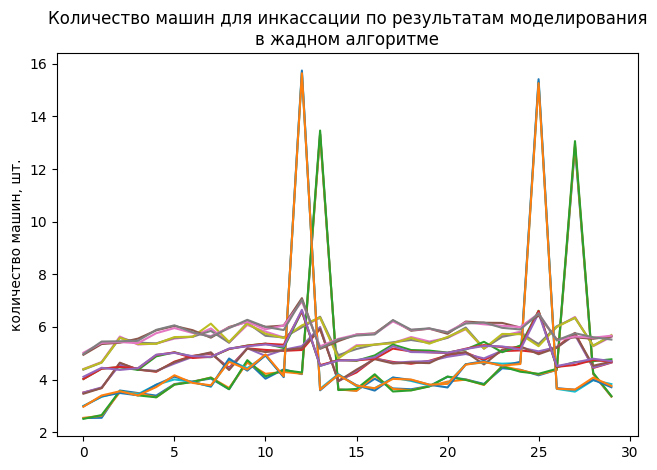

In [14]:
for title, cars_num in cars_number_dict.items():
    plt.plot(cars_num)
    plt.title('Количество машин для инкассации по результатам моделирования\nв жадном алгоритме')
plt.tight_layout()
plt.ylabel('количество машин, шт.')
plt.show()

In [17]:
all_cnts = []
for title, cars_num in cars_number_dict.items():
    all_cnts += cars_num

print('Среднее значение количества машин:', np.mean(all_cnts))

Среднее значение количества машин: 5.056598971193416
